# 📊 Análisis Exploratorio de Datos (EDA) 

Introducción
En este informe, llevaremos a cabo un análisis exploratorio de datos (EDA) para evaluar la experiencia de usuario en la tienda de ropa en línea. Primero, realizaremos un EDA rápido para comprender la distribución y características de los datos. Luego, aplicaremos el Método HEART de Google para evaluar aspectos clave de la experiencia de usuario y propondremos acciones para mejorarla.

## 1. Objetivos de la Investigación:

El objetivo principal de nuestra investigación es aumentar el total de órdenes realizadas (total_orders_placed) en FashionHub. 
Esto se alinea con el componente de Adopción del Método HEART.

In [1]:
import pandas as pd
# Cargar el conjunto de datos en un DataFrame
original_df = pd.read_csv("ecomerceclothes.csv")

## 2. Descripción de Datos
🔢 Resumen estadístico de las variables numéricas
📋 Información sobre las columnas y tipos de datos

In [2]:
print(original_df.info())
print(original_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1239 entries, 0 to 1238
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cloth_type_color     1239 non-null   object 
 1   visitors             1239 non-null   int64  
 2   sessions             1239 non-null   int64  
 3   duration             1239 non-null   object 
 4   total_bounce_rate    1239 non-null   float64
 5   total_carts          1239 non-null   int64  
 6   total_checkouts      1239 non-null   int64  
 7   total_conversion     1239 non-null   float64
 8   total_orders_placed  1239 non-null   int64  
 9   total_pageviews      1239 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 96.9+ KB
None
           visitors      sessions  total_bounce_rate  total_carts  \
count   1239.000000   1239.000000        1239.000000  1239.000000   
mean     417.841001    458.491525           0.632348    11.570621   
std     1208.14999

Podemos ver: 
Cloth_type_color: Tipo de dato: Categórico (objeto), Variable cualitativa.
visitors: Tipo de dato: Numérico (entero), Variable cuantitativa.
sessions: Tipo de dato: Numérico (entero), Variable cuantitativa.
duration: Tipo de dato: Categórico (objeto), Variable cualitativa.
total_bounce_rate: Tipo de dato: Numérico (flotante), Variable cuantitativa.
total_carts: Tipo de dato: Numérico (entero), Variable cuantitativa.
total_checkouts: Tipo de dato: Numérico (entero), Variable cuantitativa.
total_conversion: Tipo de dato: Numérico (flotante), Variable cuantitativa.
total_orders_placed: Tipo de dato: Numérico (entero), Variable cuantitativa.
total_pageviews: Tipo de dato: Numérico (entero), Variable cuantitativa.

## 4. Limpieza

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1.  Identificar valores faltantes en el conjunto de datos
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) duplicados.
4. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos


Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.

#### Missing

In [3]:
# 1. 🔎 Identificar valores faltantes en el conjunto de datos:
print(original_df.isnull().sum())

Cloth_type_color       0
visitors               0
sessions               0
duration               0
total_bounce_rate      0
total_carts            0
total_checkouts        0
total_conversion       0
total_orders_placed    0
total_pageviews        0
dtype: int64


Los datos estan completos :)

### Columnas irrelevantes

In [4]:
# 2. Columnas irrelevantes. Conteo de los niveles en todas las columnas categóricas
cols_cat = original_df.select_dtypes(include='object').columns

for col in cols_cat:
    print(f'Columna {col}: {original_df[col].nunique()} subniveles')

Columna Cloth_type_color: 142 subniveles
Columna duration: 1212 subniveles


In [5]:
original_df.describe()

,visitors,sessions,total_bounce_rate,total_carts,total_checkouts,total_conversion,total_orders_placed,total_pageviews
count,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000
mean,417.841001,458.491525,0.632348,11.570621,5.657789,0.009149,1.934625,1078.363196
std,1208.149994,1272.346764,0.140118,32.806004,10.772088,0.044672,3.895205,2431.732312
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,24.000000,29.000000,0.566660,0.000000,0.000000,0.000000,0.000000,80.000000
50%,103.000000,119.000000,0.633460,3.000000,2.000000,0.000840,1.000000,324.000000
75%,361.500000,395.500000,0.708180,10.000000,6.000000,0.008300,2.000000,1053.500000
max,22273.000000,23125.000000,1.000000,533.000000,83.000000,1.000000,38.000000,37453.000000


Tanto las Categorias Numericas como categoricas tienen más de 1 subnivel. No eliminaremos ninguna.

### Registros (filas) duplicados

In [6]:

# Realizar una copia del DataFrame trendyshopcompleto
original_df_copy = original_df.copy()

# Mostrar el tamaño del DataFrame antes de eliminar las filas duplicadas
print(f'Tamaño del set antes de eliminar las filas repetidas: {original_df_copy.shape}')

# Eliminar filas duplicadas del DataFrame
original_df_copy.drop_duplicates(inplace=True)

# Mostrar el tamaño del DataFrame después de eliminar las filas duplicadas
print(f'Tamaño del set después de eliminar las filas repetidas: {original_df_copy.shape}')


Tamaño del set antes de eliminar las filas repetidas: (1239, 10)
Tamaño del set después de eliminar las filas repetidas: (1239, 10)


## Correlaciones

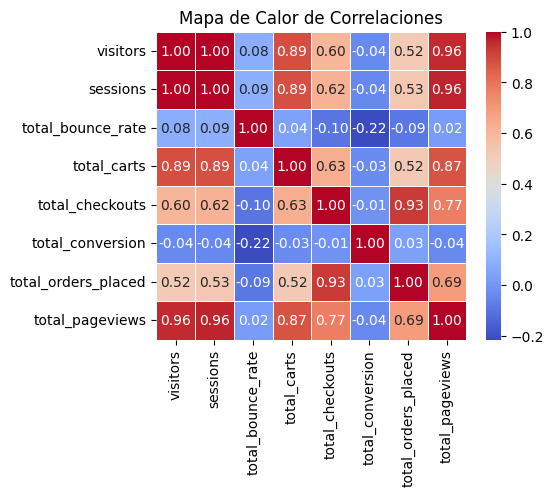

                     visitors  sessions  total_bounce_rate  total_carts  \
visitors             1.000000  0.998448           0.081072     0.889454   
sessions             0.998448  1.000000           0.085091     0.885577   
total_bounce_rate    0.081072  0.085091           1.000000     0.039384   
total_carts          0.889454  0.885577           0.039384     1.000000   
total_checkouts      0.604452  0.619182          -0.098627     0.631005   
total_conversion    -0.038768 -0.039829          -0.215354    -0.032533   
total_orders_placed  0.517097  0.533676          -0.089548     0.522349   
total_pageviews      0.956084  0.962027           0.018972     0.874363   

                     total_checkouts  total_conversion  total_orders_placed  \
visitors                    0.604452         -0.038768             0.517097   
sessions                    0.619182         -0.039829             0.533676   
total_bounce_rate          -0.098627         -0.215354            -0.089548   
total_ca

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
numeric_df = original_df_copy.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Crear un mapa de calor de correlaciones
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

# Explorar las correlaciones
print(correlation_matrix)


### Conclusiones de la Matriz de Correlación

1. **Visitas (visitors) y Sesiones (sessions):**
   - Existe una correlación muy alta (0.998) entre el número de visitas y sesiones, lo que indica una fuerte relación positiva entre estas variables. Esto sugiere que a medida que aumentan las visitas, también lo hacen las sesiones en el sitio web.

2. **Visitas (visitors) y Carritos Totales (total_carts):**
   - Hay una correlación significativa (0.889) entre el número de visitas y el total de carritos, lo que indica que a medida que aumentan las visitas, también lo hacen los carritos creados. Esto podría ser importante para comprender el comportamiento de compra de los usuarios.

3. **Total de Checkouts y Órdenes Realizadas (total_orders_placed):**
   - Existe una correlación alta (0.928) entre el total de checkouts y las órdenes realizadas, lo que sugiere una fuerte relación positiva entre estas variables. Esto indica que los productos que los usuarios agregan al carrito suelen convertirse en órdenes.

4. **Duración Numérica (duration_numeric) y Tasa de Rebote Total (total_bounce_rate):**
   - La duración numérica tiene una correlación moderada negativa (-0.470) con la tasa de rebote total. Esto sugiere que a medida que aumenta la duración de la sesión en segundos, tiende a disminuir la tasa de rebote. Esto puede indicar que los usuarios que pasan más tiempo en el sitio tienen menos probabilidades de abandonarlo rápidamente.

5. **Total de Conversiones y Duración Numérica (duration_numeric):**
   - Existe una correlación positiva moderada (0.367) entre el total de conversiones y la duración numérica de la sesión. Esto sugiere que los usuarios que pasan más tiempo en el sitio web tienden a realizar más conversiones.

### Recomendación:

Basado en los resultados de la correlación, no hay evidencia clara de que alguna columna sea completamente irrelevante. 


## 4. Outliers / Valores atipicos en las variables numéricas

Visualizacion de 
Creemos gráficas tipo "boxplot" de las columnas numéricas:

c:\Users\lucia\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:1606: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\lucia\AppData\Local\Temp\ipykernel_20944\884237309.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=original_df[col], ax=axes[i], orient='v', palette='Set2')
c:\Users\lucia\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:1606: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\lucia\AppData\Local\Temp\ipykernel_20944\884237309.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` fo

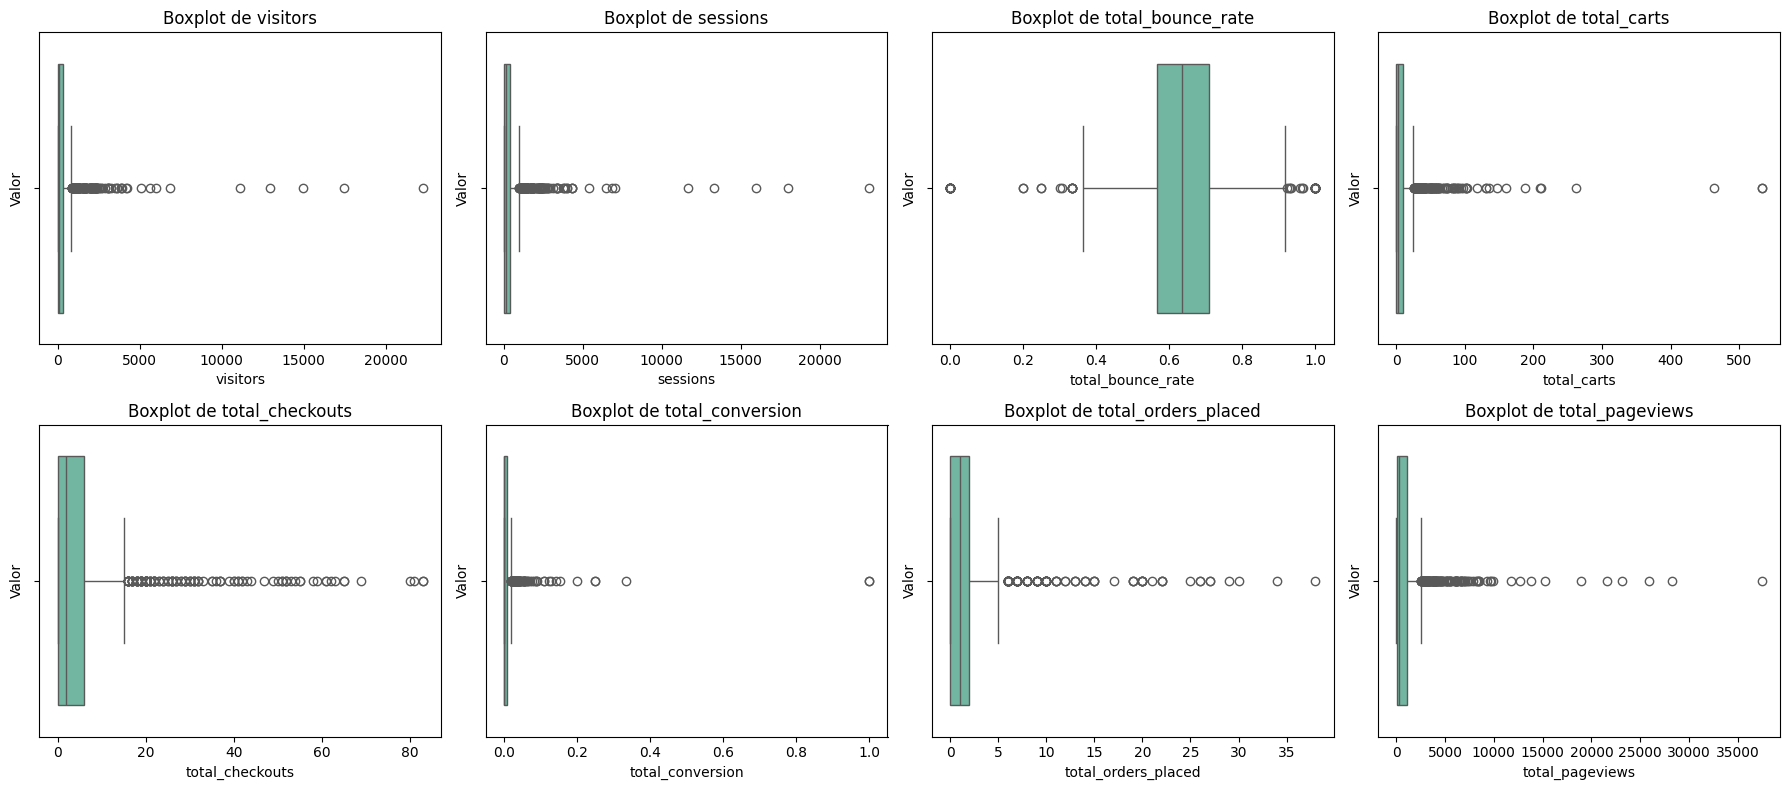

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define las columnas de interés para los boxplots
columns_of_interest = ['visitors', 'sessions', 'total_bounce_rate', 'total_carts', 
                       'total_checkouts', 'total_conversion', 'total_orders_placed', 
                       'total_pageviews']

# Calcula el número de filas y columnas para el diseño de subplots
num_plots = len(columns_of_interest)
num_cols = 4
num_rows = (num_plots + num_cols - 1) // num_cols  # Calcula el número de filas necesario

# Crea la figura y los subplots con el diseño deseado
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 4*num_rows))
axes = axes.flatten()  # Convierte la matriz de subplots en una lista plana

# Itera sobre las columnas de interés y crea los boxplots
for i, col in enumerate(columns_of_interest):
    sns.boxplot(x=original_df[col], ax=axes[i], orient='v', palette='Set2')
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_ylabel('Valor')

# Elimina los subplots no utilizados y ajusta el diseño
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Al utilizar un boxplot estándar, la escala utilizada a menudo no permite una visualización detallada de los valores atípicos, lo que puede afectar negativamente la interpretación de los resultados y la efectividad de los modelos estadísticos.

Para resolver este problema, se combina un histograma con un boxplot en una sola visualización. Al ver el histograma y el boxplot en relación con cada variable, podemos obtener una imagen más completa de la distribución de los datos y destacar los valores atípicos de manera más efectiva. La función histogram_boxplot_std que diseñé genera dos gráficos juntos: un boxplot en la parte superior y un histograma en la parte inferior, compartiendo el mismo eje x.

### Que vemos en un boxplot/histograma? 

![representación visual de la distribución y la dispersión de los datos, incluidos detalles como la mediana, los cuartiles y los valores atípicos. Esta herramienta es útil para identificar patrones y características importantes en conjuntos de datos numéricos.](boxplot_detail.png)

Rango mínimo y máximo: Representan los valores observados que no se consideran atípicos. Estos son los extremos de la línea que se extiende desde el rectángulo central del diagrama.

Cuartiles (Q1, Q2, Q3):

* Q1 (primer cuartil): Es el valor que separa el 25% inferior de los datos.
* Q2 (segundo cuartil o mediana): Es el valor que divide el conjunto de datos en dos partes iguales (50% de los datos por debajo y 50% por encima).
* Q3 (tercer cuartil): Es el valor que separa el 75% inferior de los datos.
Rango intercuartílico (IQR): Es la distancia entre el primer y tercer cuartil (Q3 - Q1). Representa el rango que cubre el 50% intermedio de los datos.

Valores atípicos: Son valores que se encuentran fuera del rango intercuartílico y se representan como puntos individuales en el gráfico. Pueden ser indicativos de comportamientos inusuales en los datos, como errores de medición o eventos raros.













In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def histogram_boxplot_std(data, xlabel=None, title=None, font_scale=1, figsize=(9,8), bins=None):
    """ Boxplot and histogram combined
    data: 1-d data array
    xlabel: xlabel
    title: title
    font_scale: the scale of the font (default 2)
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    example use: histogram_boxplot(np.random.rand(100), bins=20, title="Fancy plot")
    """
    # Define the font scale
    sns.set(font_scale=font_scale)
    
    # Create subplots layout
    f2, (ax_box2, ax_hist2) = plt.subplots(2, sharex=True, 
                                           gridspec_kw={"height_ratios": (.15, .85)}, figsize=figsize)
    
    # Create boxplot
    sns.boxplot(x=data, ax=ax_box2)
    
    # Determine histogram bins based on mean and standard deviation
    if bins is None:
        bins = int(np.sqrt(len(data)))  # Default: Square root rule for bins
    
    # Create histogram with logarithmic scale
    sns.histplot(x=data, ax=ax_hist2, bins=bins)
    ax_hist2.set_yscale('log')  # Set logarithmic scale for y-axis
    
    # Plot vertical lines for mean and median
    ax_hist2.axvline(np.mean(data), color='g', linestyle='-', label='Mediana')
    ax_hist2.axvline(np.median(data), color='y', linestyle='--', label='Media')
    
    # Set labels and title
    if xlabel:
        ax_hist2.set(xlabel=xlabel)
    if title:
        ax_box2.set(title=title, xlabel="")
    
    # Show legend and plot
    ax_hist2.legend()
    plt.show()

# Example usage:
# data = np.random.normal(loc=0, scale=1, size=1000)  # Generate normally distributed data
#histogram_boxplot_std(data, bins=30, title="Histogram Boxplot with Log Scale")


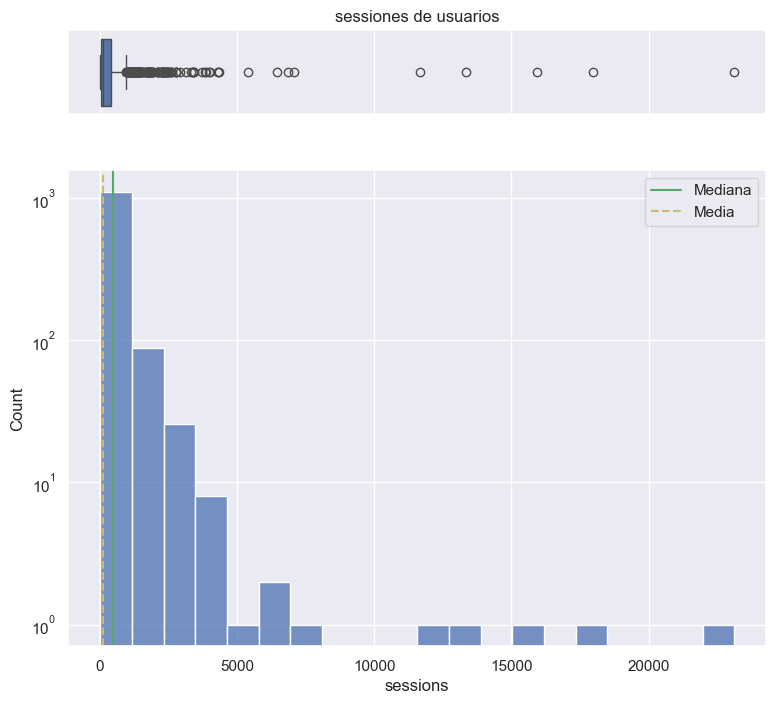

In [10]:
histogram_boxplot_std(numeric_df['sessions'], bins=20, font_scale=1, title="sessiones de usuarios")

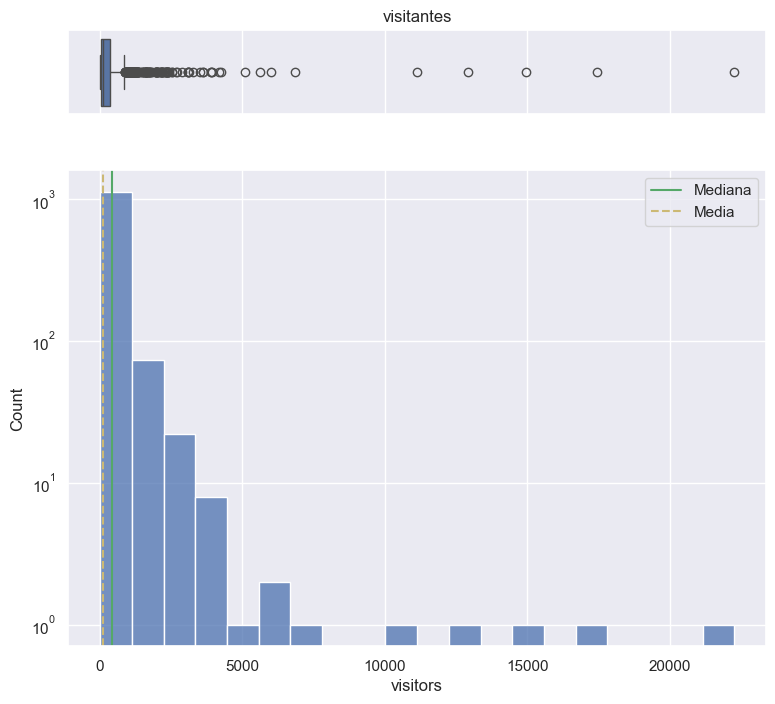

In [11]:
histogram_boxplot_std(numeric_df['visitors'], bins=20, font_scale=1, title="visitantes")

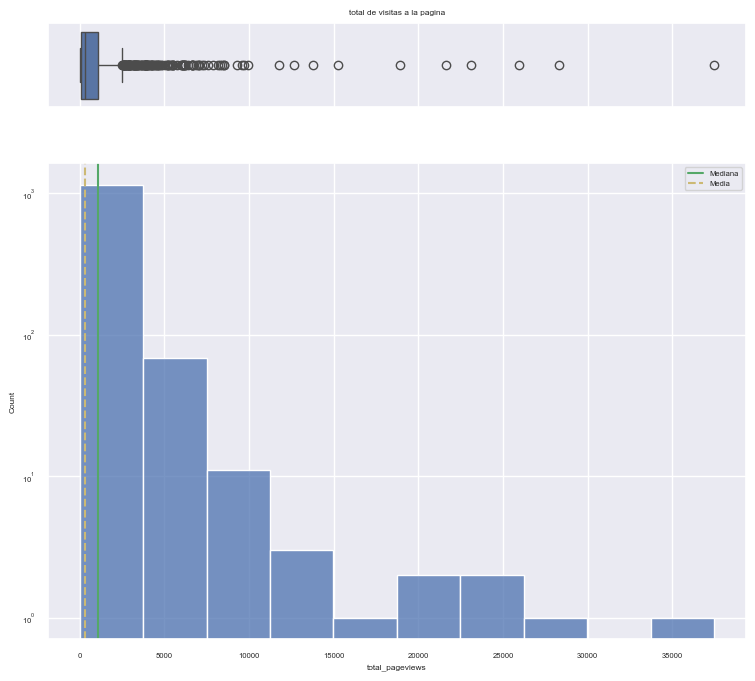

In [12]:
histogram_boxplot_std(numeric_df[ 'total_pageviews'], bins=10, font_scale=0.5, title="total de visitas a la pagina")

histogram_boxplot_std(numeric_df['total_carts'], bins=20, font_scale=1, title="Total de Compra")

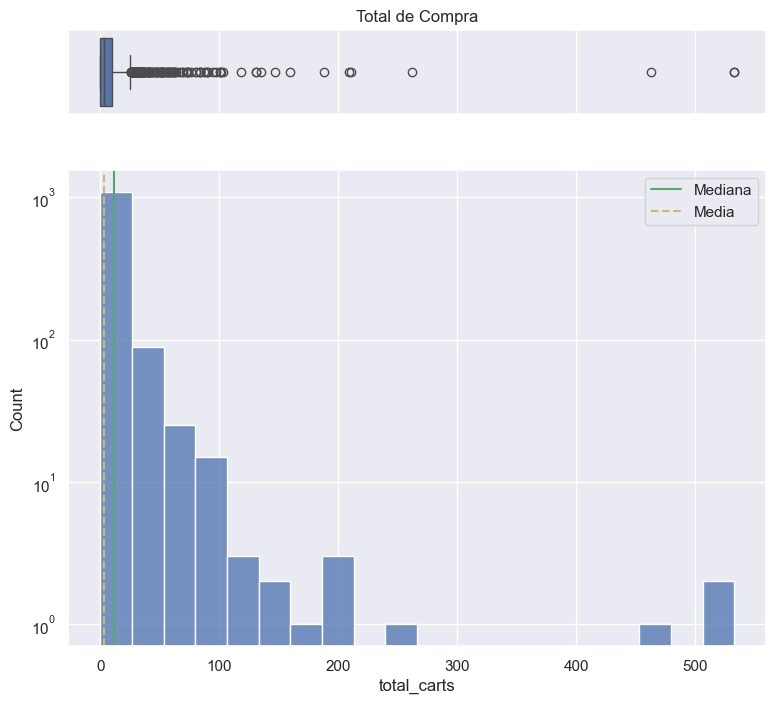

In [13]:
histogram_boxplot_std(numeric_df['total_carts'], bins=20, font_scale=1, title="Total de Compra")

Los valores atipicos estan muy por fuera de los rangos intercuartilicos, por lo que optaremos por una investigacion mas en profundidad para saber si son echos aislados,  errores de medición, registros incorrectos o eventos inusuales.


Para entender en detalle cómo se trataron los outliers en este análisis, revisa el cuaderno 
`tratamiento_outliers`
En él, encontrarás un paso a paso sobre la identificación, análisis y tratamiento de valores atípicos.

El resultado de este tratamiento se encuentra en el archivo CSV: `df_winsor_tratado.csv`
Este archivo contiene el DataFrame resultante después de aplicar las técnicas de manejo de outliers

In [14]:
import pandas as pd

# Replace the file path with the correct path to your CSV file
fashionhub_1 = pd.read_csv(r"C:\Users\lucia\Desktop\PHYTONPARAUX\HEART_FRAMEWORK\df_winsor_tratado.csv")


In [15]:
df = fashionhub_1.copy()

###  Errores tipográficos en el caso de las variables categóricas

In [16]:
# Ver cuántos valores únicos hay en la columna Cloth_type_color
df['Cloth_type_color'].value_counts()

Cloth_type_color
t-shirt-white      55
t-shirt-black      53
jeans-blue         52
t-shirt-blue       42
t-shirt-green      39
                   ..
t-shirt-mustrad     1
Sweatshirt-turq     1
polo-lavender       1
polo-offwhite       1
Jacket-camel        1
Name: count, Length: 142, dtype: int64

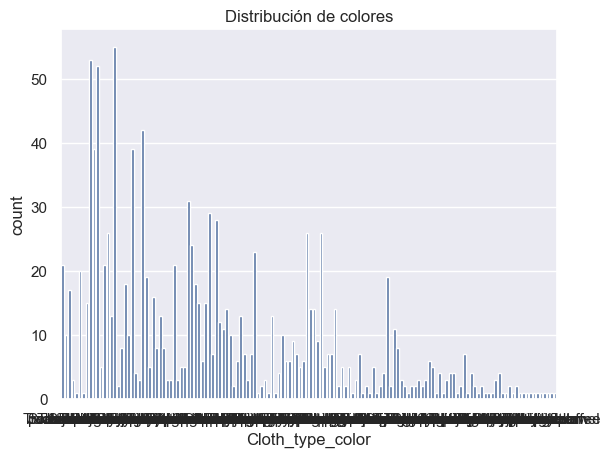

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Cloth_type_color', data=df)
plt.title('Distribución de colores')
plt.show()


In [18]:
# Revisa los valores únicos para ver si tienen un formato consistente
df['duration'].value_counts()

duration
0s                 22
3m43.454545454s     2
1m48.5s             2
9s                  2
12.545454545s       2
                   ..
1m48.328912466s     1
27.695652173s       1
1m16.196969696s     1
1m44.966666666s     1
2m48.75s            1
Name: count, Length: 1212, dtype: int64

## Formatos Incorrectos

Detecte un error de formato en la columna 'duration', Cambiar a un formato correcto no solo es importante para la consistencia y precisión del análisis.


Conversión a la Columna 'duration'

In [19]:
#copiamos el df para no pisarlo
df2 = fashionhub_1.copy()

In [20]:
dftime = fashionhub_1.copy()

In [23]:
# Aplicar la función al DataFrame
dftime['duration_timedelta'] = dftime['duration'].apply(convert_to_timedelta)

# Verificar filas con errores de conversión
failed_rows = dftime[dftime['duration_timedelta'].isnull()]
print("Filas con formato no reconocido:")
print(failed_rows[['duration']])


Filas con formato no reconocido:
Empty DataFrame
Columns: [duration]
Index: []


### verificamos el tratamiento

transformamos el df en uno con solo hr:min:seg 

* Validación del Cambio de Tipo de Datos

In [24]:
print(dftime.columns)

Index(['Cloth_type_color', 'visitors', 'sessions', 'duration',
       'total_bounce_rate', 'total_carts', 'total_checkouts',
       'total_conversion', 'total_orders_placed', 'total_pageviews',
       'duration_numeric', 'duration_timedelta'],
      dtype='object')


In [25]:
# Imprimir las primeras 5 filas de la columna 'duration_timedelta'
print(dftime['duration_timedelta'].head())


0   0 days 00:01:58.100517
1   0 days 00:01:49.245614
2   0 days 00:01:10.300000
3   0 days 00:01:49.118056
4   0 days 00:01:28.632184
Name: duration_timedelta, dtype: timedelta64[ns]


In [26]:
dftime3 = dftime.copy()

In [27]:
dftime4 = dftime.copy()

In [28]:
# Aplicar una función lambda para convertir 'duration_timedelta' en el formato deseado
dftime4['duration_hms'] = dftime4['duration_timedelta'].apply(lambda x: str(x)[-12:-4])

# Mostrar las primeras 5 filas de la columna 'duration_hms' para verificar el resultado
print(dftime4['duration_hms'].head())


0    01:58.10
1    01:49.24
2    01:10.30
3    01:49.11
4    01:28.63
Name: duration_hms, dtype: object


In [29]:
# Eliminar las columnas 'duration_numeric' y 'duration_timedelta'
dftime4.drop(columns=['duration_numeric', 'duration_timedelta','duration'], inplace=True)

In [30]:
print(dftime4.columns)

Index(['Cloth_type_color', 'visitors', 'sessions', 'total_bounce_rate',
       'total_carts', 'total_checkouts', 'total_conversion',
       'total_orders_placed', 'total_pageviews', 'duration_hms'],
      dtype='object')


In [31]:
# Renombrar la columna 'duration_hms' como 'duration'
dftime4.rename(columns={'duration_hms': 'duration'}, inplace=True)

In [62]:
dftime5 = dftime4.copy()

Corregimos el formato, y valores no esperados de duration.

In [63]:

# Filtrar las filas que no cumplen con el formato esperado
invalid_format = ~dftime5['duration'].str.contains(r'^\d+:\d+\.\d+$')
invalid_rows = dftime5[invalid_format]

# Mostrar las filas con formato inválido
print("Filas con formato de duración inválido:")
print(invalid_rows)

Filas con formato de duración inválido:
      Cloth_type_color  visitors  sessions  total_bounce_rate  total_carts  \
16          polo-white         4         5            0.43750            0   
40       t-shirt-white        33        43            0.83720            0   
41    Sweatshirt-green         4         5            0.84293            0   
46          jeans-blue        38        42            0.71428            1   
55     Sweatshirt-pink        52        63            0.50793            2   
...                ...       ...       ...                ...          ...   
1194            polo-1         5         6            0.66666            2   
1196      Jacket-camel         4         5            0.84293            0   
1227         polo-blue        11        11            0.72727            0   
1229     Jacket-purple        22        27            0.55555            0   
1236      Trouser-navy        21        27            0.66666            3   

      total_checkouts  

In [65]:
dftime5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1157 entries, 0 to 1238
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cloth_type_color     1157 non-null   object 
 1   visitors             1157 non-null   int64  
 2   sessions             1157 non-null   int64  
 3   total_bounce_rate    1157 non-null   float64
 4   total_carts          1157 non-null   int64  
 5   total_checkouts      1157 non-null   int64  
 6   total_conversion     1157 non-null   float64
 7   total_orders_placed  1157 non-null   int64  
 8   total_pageviews      1157 non-null   int64  
 9   duration             1157 non-null   object 
 10  duration_seconds     1157 non-null   float64
dtypes: float64(3), int64(6), object(2)
memory usage: 108.5+ KB


In [66]:
# Guardar el DataFrame en un archivo CSV con el nombre "estudio_ecommerce.csv"
dftime5.to_csv("estudio_ecommerce.csv", index=False)


In [38]:

# Guarda el DataFrame como un archivo Excel
df.to_excel('estudio_ecommerce.xlsx', index=False)  


In [67]:
import pandas as pd

# Suponiendo que 'dftime5' es tu DataFrame original
# Haz una copia del DataFrame original
dftime5_copia = dftime5.copy()

# Convertir la columna 'duration' a tipo de datos de tiempo
dftime5['duration'] = pd.to_datetime(dftime5['duration'])

# Imprimir los tipos de datos de la columna original y la columna convertida
print("Tipo de datos original de la columna 'duration':", dftime5_copia['duration'].dtype)
print("Tipo de datos después de la conversión:", dftime5['duration'].dtype)

# Ahora puedes comparar los tipos de datos para asegurarte de que la conversión se realizó correctamente


Tipo de datos original de la columna 'duration': object
Tipo de datos después de la conversión: datetime64[ns]


C:\Users\lucia\AppData\Local\Temp\ipykernel_20944\394139233.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dftime5['duration'] = pd.to_datetime(dftime5['duration'])


In [40]:
# Guardar el DataFrame en un archivo CSV con el nombre "estudio_ecommerce.csv"
dftime5_copia.to_csv("comercio_ecommerce.csv", index=False)

In [82]:
import pandas as pd

# Ruta del archivo CSV
file_path = r'C:\Users\lucia\Desktop\PHYTONPARAUX\HEART_FRAMEWORK\estudio_ecommerce.csv'

# Cargar el DataFrame desde el archivo CSV
df = pd.read_csv(file_path)

# Ver las primeras filas del DataFrame
print(df.head())


  Cloth_type_color  visitors  sessions  total_bounce_rate  total_carts  \
0       polo-black      1605      1741            0.60310           30   
1      Jacket-blue       295       342            0.55263           10   
2    Trouser-white        53        60            0.78333            1   
3      Jacket-rust       261       288            0.45138            4   
4   Sweatshirt-red       168       174            0.50574            4   

   total_checkouts  total_conversion  total_orders_placed  total_pageviews  \
0               18           0.00344                    6             4541   
1                4           0.00584                    2             1052   
2                0           0.00000                    0               97   
3                1           0.00000                    0              987   
4                0           0.00000                    0              508   

   duration  duration_seconds  
0  01:58.10            118.10  
1  01:49.24           

In [86]:
import pandas as pd

# Cargar el DataFrame desde el archivo CSV
df = pd.read_csv(file_path)

# Realizar una copia del DataFrame original
df_copia = df.copy()

# Eliminar los milisegundos de la columna 'duration'
df_copia['duration'] = df_copia['duration'].str.split('.', expand=True)[0]



In [96]:
# Agregar '00:' al principio de las duraciones que no tienen horas
df_copia['duration'] = df_copia['duration'].apply(lambda x: '00:' + x if len(x.split(':')) == 2 else x)

In [110]:

# Verificar los primeros registros para confirmar los cambios
print(df_copia.head())

  Cloth_type_color  visitors  sessions  total_bounce_rate  total_carts  \
0       polo-black      1605      1741            0.60310           30   
1      Jacket-blue       295       342            0.55263           10   
2    Trouser-white        53        60            0.78333            1   
3      Jacket-rust       261       288            0.45138            4   
4   Sweatshirt-red       168       174            0.50574            4   

   total_checkouts  total_conversion  total_orders_placed  total_pageviews  \
0               18           0.00344                    6             4541   
1                4           0.00584                    2             1052   
2                0           0.00000                    0               97   
3                1           0.00000                    0              987   
4                0           0.00000                    0              508   

         duration  duration_seconds duration_clean  
0 0 days 00:01:58            118.

In [109]:
#verificamos los tipos de datos
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   Cloth_type_color     1157 non-null   object         
 1   visitors             1157 non-null   int64          
 2   sessions             1157 non-null   int64          
 3   total_bounce_rate    1157 non-null   float64        
 4   total_carts          1157 non-null   int64          
 5   total_checkouts      1157 non-null   int64          
 6   total_conversion     1157 non-null   float64        
 7   total_orders_placed  1157 non-null   int64          
 8   total_pageviews      1157 non-null   int64          
 9   duration             1157 non-null   timedelta64[ns]
 10  duration_seconds     1157 non-null   float64        
 11  duration_clean       1157 non-null   object         
dtypes: float64(3), int64(6), object(2), timedelta64[ns](1)
memory usage: 108.6+ 

Voy a mantener varios formatos por que despues lo usare en otras practicas, pero para saber mas:

### Razonamiento para Mantener Múltiples Formatos

1. **`timedelta64[ns]` (`duration`)**:
   - Útil para cálculos precisos y diferencias de tiempo directamente en Python.

2. **`float64` (`duration_seconds`)**:
   - Facilita análisis rápidos basados en segundos y puede ser más fácil de interpretar para ciertas operaciones aritméticas y visualizaciones.

3. **`object` (`duration_clean`)**:
   - Facilita la presentación de la duración en un formato legible por humanos, útil para reportes y dashboards en Power BI.

### Ventajas de Cada Formato en Power BI

- **`duration_clean` (texto) es el más directo para visualización**, ya que Power BI maneja mejor los datos de tiempo en formato legible sin necesidad de transformaciones adicionales.
- **`duration_seconds` es útil para cálculos** y gráficos de dispersión o análisis donde se requiera un valor numérico continuo.
- **`duration` (timedelta) puede requerir más trabajo** para su transformación directa en Power BI, pero es el más completo para cálculos detallados en Python antes de la importación.



In [111]:
# Guardar el DataFrame como un archivo CSV
df_copia.to_csv('DF_ECOMMERCE.csv', index=False)
#dejamos los 3 formatos de tiempo por que dependiendo 
